In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb

In [2]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge.csv")

In [3]:
print(df_merged.shape)

(40000, 2)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42
)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Tree-Based-Models

## RandomForest

In [6]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [7]:
pred_rf = RF.predict(xv_test)

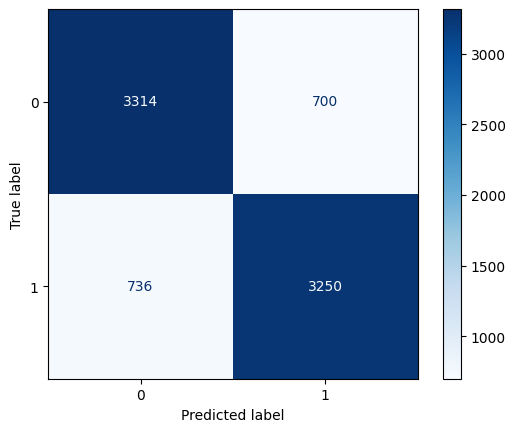

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [9]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4014
           1       0.82      0.82      0.82      3986

    accuracy                           0.82      8000
   macro avg       0.82      0.82      0.82      8000
weighted avg       0.82      0.82      0.82      8000



In [28]:
param_grid_clf = {
    'n_estimators': [50, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
}

In [29]:
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_clf, cv=2, scoring='accuracy', verbose=3)

In [30]:
clf.fit(xv_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END max_depth=None, max_features=sqrt, n_estimators=50;, score=0.829 total time=  11.8s
[CV 2/2] END max_depth=None, max_features=sqrt, n_estimators=50;, score=0.829 total time=  11.5s
[CV 1/2] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.833 total time=  47.9s
[CV 2/2] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.833 total time=  46.3s
[CV 1/2] END max_depth=None, max_features=log2, n_estimators=50;, score=0.833 total time=  14.6s
[CV 2/2] END max_depth=None, max_features=log2, n_estimators=50;, score=0.833 total time=  14.4s
[CV 1/2] END max_depth=None, max_features=log2, n_estimators=200;, score=0.843 total time=  58.0s
[CV 2/2] END max_depth=None, max_features=log2, n_estimators=200;, score=0.846 total time=  57.5s
[CV 1/2] END max_depth=10, max_features=sqrt, n_estimators=50;, score=0.778 total time=   0.6s
[CV 2/2] END max_depth=10, max_features=sqrt, n_estimators=50;, 

C:\Users\Mateusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 200]},
             scoring='accuracy', verbose=3)

In [32]:
best_clf = clf.best_estimator_
y_clf_pred = best_clf.predict(xv_test)
print(f"Best Parameters for Classification: {clf.best_params_}")
print("Classification Accuracy:", accuracy_score(y_test, y_clf_pred))
print("Classification Report:\n", classification_report(y_test, y_clf_pred))

Best Parameters for Classification: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
Classification Accuracy: 0.844
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      2019
           1       0.86      0.82      0.84      1981

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



## xGBoost

In [10]:
xgb_model = xgb.XGBClassifier(random_state = 0)
xgb_model.fit(xv_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [11]:
pred_xgb = xgb_model.predict(xv_test)

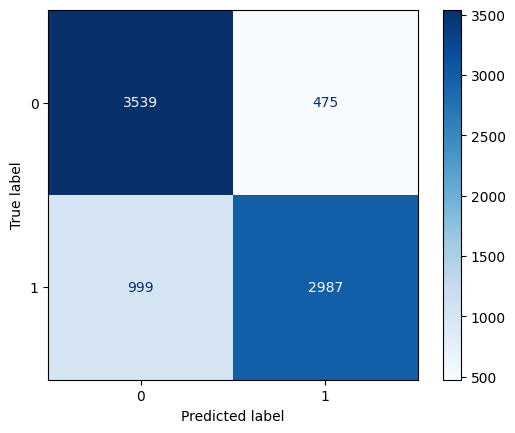

In [12]:
cm = confusion_matrix(y_test, pred_xgb)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [13]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      4014
           1       0.86      0.75      0.80      3986

    accuracy                           0.82      8000
   macro avg       0.82      0.82      0.81      8000
weighted avg       0.82      0.82      0.81      8000

